<a href="https://colab.research.google.com/github/JeffAkkerman/DataScience/blob/main/Day_99_Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

In [3]:
# Jeff Added

import plotly.graph_objects as go

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_list = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]
i=0
for df in df_list:
  i += 1
  print('―' * 50)
  print(f"\nDF {i} has shape: {df.shape} \n\nColumn names: {df.columns.tolist()} \n\nThere are {len(df[df.duplicated()])} duplicate rows and {df.isna().values.sum()} NaN values\n")
  print('―' * 50)

――――――――――――――――――――――――――――――――――――――――――――――――――

DF 1 has shape: (29322, 3) 

Column names: ['Geographic Area', 'City', 'Median Income'] 

There are 0 duplicate rows and 51 NaN values

――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――

DF 2 has shape: (29329, 3) 

Column names: ['Geographic Area', 'City', 'poverty_rate'] 

There are 0 duplicate rows and 0 NaN values

――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――

DF 3 has shape: (29329, 3) 

Column names: ['Geographic Area', 'City', 'percent_completed_hs'] 

There are 0 duplicate rows and 0 NaN values

――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――

DF 4 has shape: (29268, 7) 

Column names: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'] 

There are 0 duplicate rows and 0 NaN values

―――――――――――――――――――――

In [7]:
df_fatalities.rename(columns={"state": "Geographic Area", "city": "City"}, inplace=True)
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,City,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [8]:
df_share_race_city.rename(columns={"Geographic area": "Geographic Area"}, inplace=True)
df_share_race_city

,Geographic Area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [9]:
i=0
for df in df_list:
  i+=1
  print(f"DF {i}:\n")
  print(df)
  print('―' * 50)
  print('―' * 50)

DF 1:

      Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317              WY  Woods Landing-Jelm CDP           NaN
29318              WY            Worland city         41523
29319              WY             Wright town         77114
29320              WY              Yoder town         37500
29321              WY           Y-O Ranch CDP           NaN

[29322 rows x 3 columns]
――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――
DF 2:

      Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  A

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
i=0
for df in df_list:
  i += 1
  print('―' * 50)
  print(f"\nDF {i} has {len(df[df.duplicated()])} duplicate rows and {df.isna().values.sum()} NaN values\n")
  print('―' * 50)

――――――――――――――――――――――――――――――――――――――――――――――――――

DF 1 has 0 duplicate rows and 51 NaN values

――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――

DF 2 has 0 duplicate rows and 0 NaN values

――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――

DF 3 has 0 duplicate rows and 0 NaN values

――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――

DF 4 has 0 duplicate rows and 0 NaN values

――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――

DF 5 has 0 duplicate rows and 346 NaN values

――――――――――――――――――――――――――――――――――――――――――――――――――


In [11]:
# df_list = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]
nan_df_hh_income = df_hh_income[df_hh_income.isna().any(axis=1)]
nan_df_hh_income

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN
29130,WY,Arrowhead Springs CDP,NaN
29132,WY,Atlantic City CDP,NaN
29133,WY,Auburn CDP,NaN
29139,WY,Bedford CDP,NaN
29140,WY,Bessemer Bend CDP,NaN


In [12]:
nan_df_hh_income.shape

(51, 3)

In [13]:
wy_count = df_hh_income[df_hh_income['Geographic Area'] == "WY"]
wy_count

,Geographic Area,City,Median Income
29118,WY,Afton town,55227
29119,WY,Albany CDP,NaN
29120,WY,Albin town,40875
29121,WY,Alcova CDP,NaN
29122,WY,Alpine town,65417
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [14]:
# df_hh_income.fillna(0,inplace=True)

In [15]:
nan_df_fatalities = df_fatalities[df_fatalities.isna().any(axis=1)]
nan_df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,City,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,25/01/15,shot,gun,59.00,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
241,244,John Marcell Allen,30/03/15,shot,gun,54.00,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.00,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,07/05/15,shot,knife,72.00,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False


In [16]:
col_fatal_list = df_fatalities.columns.tolist()

for col in col_fatal_list:
  print(f"{col} - {df_fatalities[col].isna().sum()} NaN values.")

id - 0 NaN values.
name - 0 NaN values.
date - 0 NaN values.
manner_of_death - 0 NaN values.
armed - 9 NaN values.
age - 77 NaN values.
gender - 0 NaN values.
race - 195 NaN values.
City - 0 NaN values.
Geographic Area - 0 NaN values.
signs_of_mental_illness - 0 NaN values.
threat_level - 0 NaN values.
flee - 65 NaN values.
body_camera - 0 NaN values.


In [17]:
df_fatalities[df_fatalities['flee'].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,City,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera
857,1007,Ernesto Gamino,13/11/15,shot,undetermined,25.00,M,H,Jurupa Valley,CA,False,undetermined,NaN,False
874,1020,Randy Allen Smith,19/11/15,shot,gun,34.00,M,B,Manatee,FL,False,attack,NaN,False
898,1042,Zachary Grigsby,29/11/15,shot,gun,29.00,M,W,Lincoln,NE,False,attack,NaN,False
935,1083,Roy Carreon,12/12/15,shot,knife,49.00,M,H,San Bernardino,CA,False,attack,NaN,False
936,1086,Efrain Villanueva,12/12/15,shot,unknown weapon,NaN,M,NaN,Aurora,CO,False,attack,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,2749,Carroll Tuttle,05/07/17,shot,gun,51.00,M,W,Madison,ME,False,attack,NaN,False
2468,2745,Dejuan Guillory,06/07/17,shot,undetermined,27.00,M,NaN,Mamou,LA,False,undetermined,NaN,False
2482,2767,Caleb Edward Blaylock,11/07/17,shot,knife,27.00,M,NaN,Las Vegas,NV,True,undetermined,NaN,True
2487,2772,James Gerald Davis,12/07/17,shot,NaN,40.00,M,NaN,Lake View,SC,False,undetermined,NaN,False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [18]:
df_pct_poverty.sort_values("poverty_rate")

,Geographic Area,City,poverty_rate
25810,TX,Rafael Pena CDP,-
25652,TX,Northridge CDP,-
3076,CA,Robinson Mill CDP,-
676,AK,Eureka Roadhouse CDP,-
25674,TX,Olivia Lopez de Gutierrez CDP,-
...,...,...,...
26509,UT,Randlett CDP,93.5
20428,OK,Badger Lee CDP,93.8
27738,WA,Outlook CDP,93.8
23716,SD,Allen CDP,94.1


In [19]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [20]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [21]:
df_pct_poverty.isna().values.sum()

201

In [22]:
nan_df_pct_poverty = df_pct_poverty[df_pct_poverty.isna().any(axis=1)]
nan_df_pct_poverty["Geographic Area"].value_counts()

TX    37
CA    21
AK    21
WY    17
NM    11
MO     9
WA     8
AZ     7
UT     7
SD     7
CO     6
IA     5
PA     4
OK     4
IL     3
NY     3
FL     3
NE     3
GA     3
NJ     2
MT     2
MD     2
OH     2
KS     2
OR     2
ID     2
WV     1
AL     1
SC     1
ND     1
NC     1
MA     1
LA     1
NV     1
Name: Geographic Area, dtype: int64

In [23]:
df_pct_poverty_state = df_pct_poverty.groupby("Geographic Area", as_index=False).mean().sort_values("poverty_rate", ascending=False)
df_pct_poverty_state

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96
18,LA,22.34
40,SC,22.16
49,WV,21.13
36,OK,20.66
1,AL,20.65


In [24]:
# Working with Color Scales in Plotly
bar = px.bar(x = df_pct_poverty_state["Geographic Area"], # index = category name
                 y = df_pct_poverty_state["poverty_rate"], # count
                 title='Poverty Rate by State',
                 hover_name=df_pct_poverty_state["Geographic Area"],
                 color=df_pct_poverty_state["poverty_rate"],
                 color_continuous_scale='Agsunset')
     
bar.update_layout(xaxis_title='State',
                              yaxis_title='Percent Poverty Rate',
                              coloraxis_showscale=False)
     
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [25]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [26]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [27]:
df_pct_completed_hs.isna().values.sum()

197

In [28]:
df_pct_completed_hs_nan = df_pct_completed_hs[df_pct_completed_hs.isna().any(axis=1)]
df_pct_completed_hs_nan["Geographic Area"].value_counts()

TX    37
CA    21
AK    19
WY    18
NM    11
MO     9
WA     8
AZ     7
UT     7
SD     7
CO     6
IA     5
OK     4
OR     3
NE     3
FL     3
GA     3
IL     3
MD     2
NJ     2
ID     2
OH     2
MT     2
KS     2
MA     1
SC     1
WV     1
KY     1
PA     1
ND     1
NC     1
NY     1
LA     1
NV     1
AL     1
Name: Geographic Area, dtype: int64

In [29]:
df_pct_complete_hs_state = df_pct_completed_hs.groupby("Geographic Area", as_index=False).mean().sort_values("percent_completed_hs")
df_pct_complete_hs_state

,Geographic Area,percent_completed_hs
43,TX,75.69
25,MS,78.47
10,GA,79.01
18,LA,79.29
2,AR,79.95
1,AL,80.30
3,AZ,80.47
40,SC,80.85
32,NM,80.98
42,TN,81.63


In [30]:
# Working with Color Scales in Plotly
bar = px.bar(x = df_pct_complete_hs_state["Geographic Area"], # index = category name
                 y = df_pct_complete_hs_state["percent_completed_hs"], # count
                 title='Percent of Pop. Over 25 who Graduated High School by State',
                 hover_name=df_pct_complete_hs_state["Geographic Area"],
                 color=df_pct_complete_hs_state["percent_completed_hs"],
                 color_continuous_scale='Agsunset')
     
bar.update_layout(xaxis_title='State',
                              yaxis_title='Percent of Pop. Over 25 who Graduated High School',
                              coloraxis_showscale=False)
     
bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the ratios of poverty and high school graduation move together.  

Text(0, 0.5, '% of Pop. in Poverty')

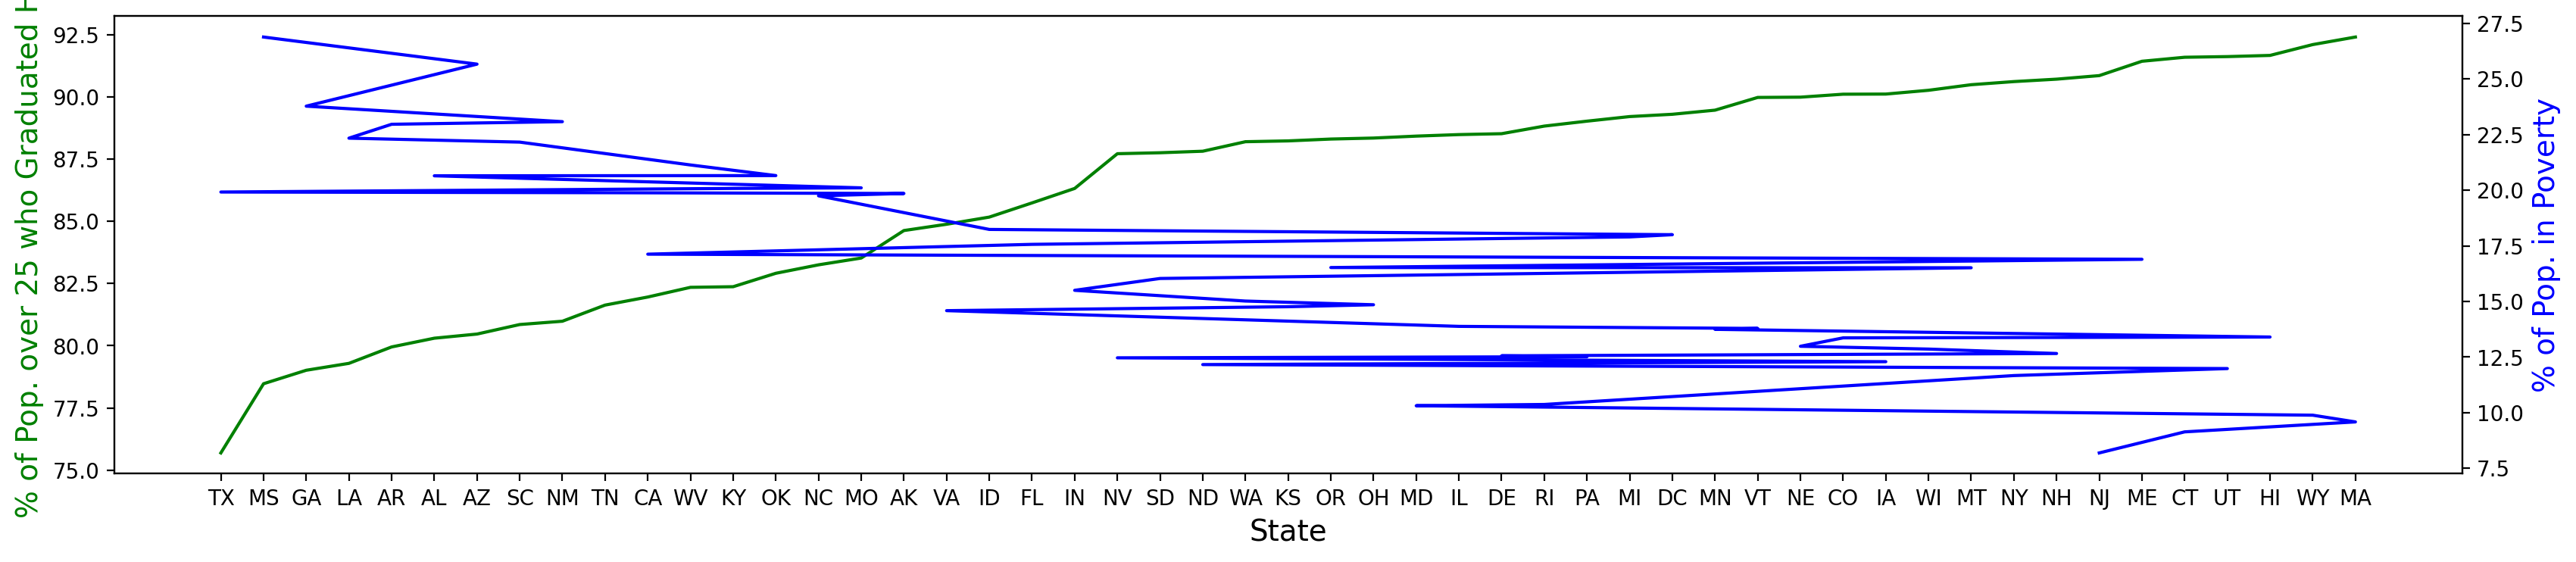

In [31]:
plt.figure(figsize=(20,4), dpi=200)
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(df_pct_complete_hs_state['Geographic Area'], df_pct_complete_hs_state['percent_completed_hs'], color='g')
ax2.plot(df_pct_poverty_state['Geographic Area'], df_pct_poverty_state['poverty_rate'], 'b')

ax1.set_xlabel("State", fontsize=14)
ax1.set_ylabel("% of Pop. over 25 who Graduated HS", color='green', fontsize=14)
ax2.set_ylabel("% of Pop. in Poverty", color="blue", fontsize=14)

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [32]:
# Merge poverty and HS graduation df together
poverty_hs_merged_df = pd.merge(df_pct_poverty_state, df_pct_complete_hs_state, on='Geographic Area')
poverty_hs_merged_df

,Geographic Area,poverty_rate,percent_completed_hs
0,MS,26.88,78.47
1,AZ,25.67,80.47
2,GA,23.78,79.01
3,NM,23.08,80.98
4,AR,22.96,79.95
5,LA,22.34,79.29
6,SC,22.16,80.85
7,WV,21.13,82.35
8,OK,20.66,82.91
9,AL,20.65,80.30


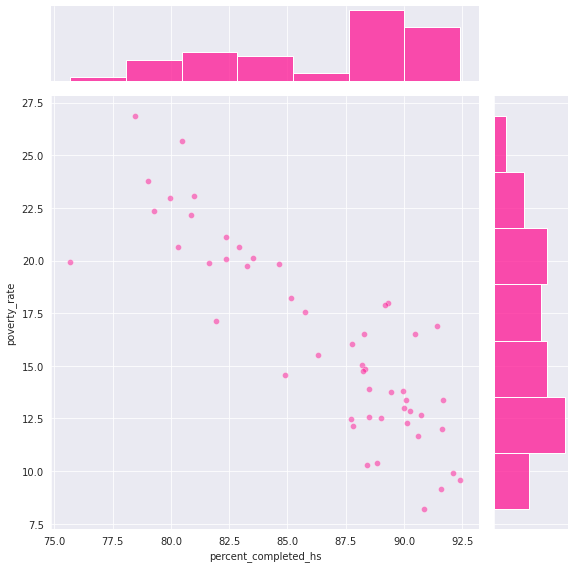

In [33]:
# Seaborn .jointplot with scatterplot https://seaborn.pydata.org/generated/seaborn.jointplot.html

with sns.axes_style('darkgrid'):
  sns.jointplot(x=poverty_hs_merged_df['percent_completed_hs'], 
                y=poverty_hs_merged_df['poverty_rate'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

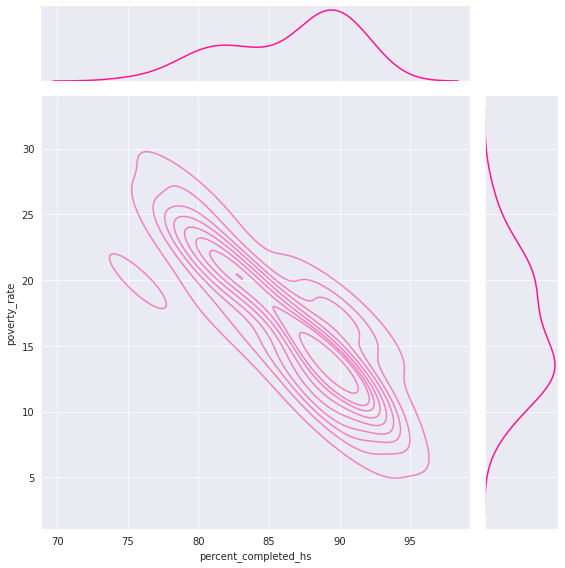

In [34]:
# Seaborn .jointplot with KDE https://seaborn.pydata.org/generated/seaborn.jointplot.html

with sns.axes_style('darkgrid'):
  sns.jointplot(x=poverty_hs_merged_df['percent_completed_hs'], 
                y=poverty_hs_merged_df['poverty_rate'], 
                height=8, 
                kind='kde',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

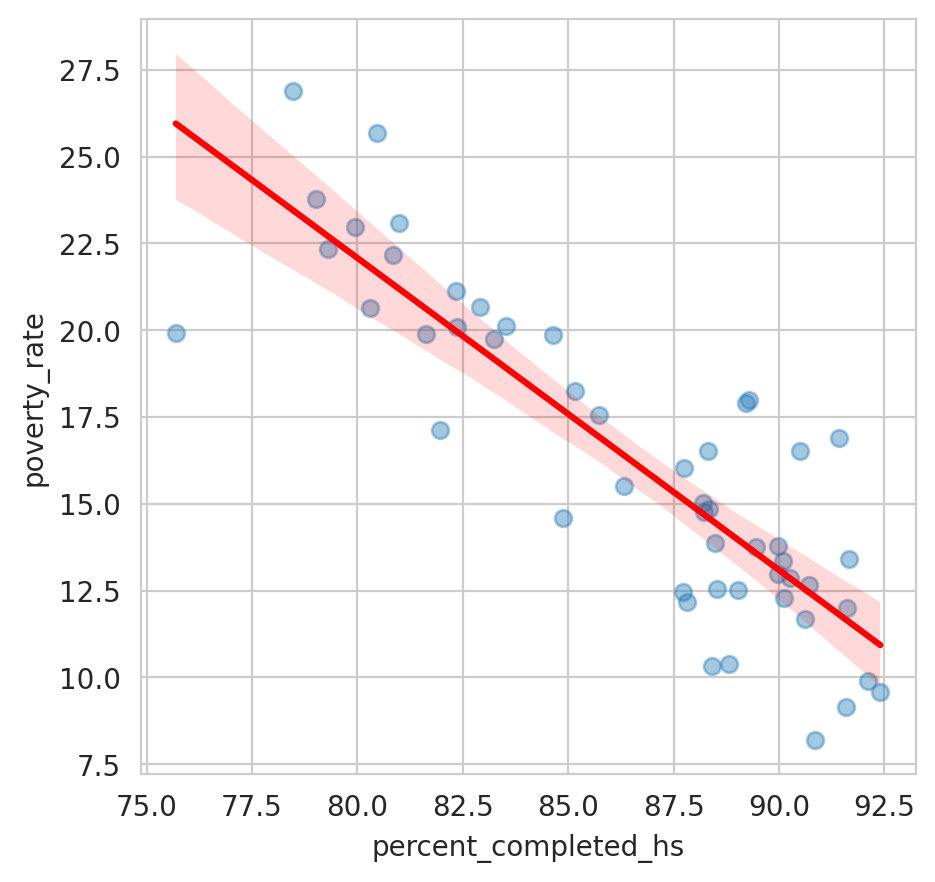

In [35]:
# Seaborn .regplot() https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot

plt.figure(figsize=(5,5), dpi=200)

with sns.axes_style("whitegrid"):
  sns.regplot(data=poverty_hs_merged_df,
              x='percent_completed_hs',
              y='poverty_rate',
              line_kws={'color':'red'},
              scatter_kws={'alpha':0.4},
              )
plt.show()

<Figure size 2000x2000 with 0 Axes>

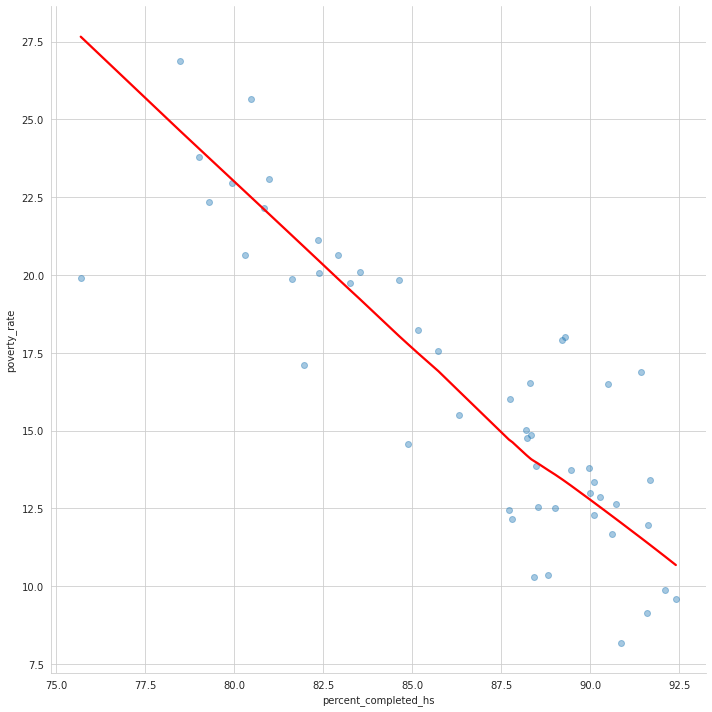

In [36]:
# Seaborn .lmplot() https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

plt.figure(figsize=(10,10), dpi=200)

with sns.axes_style("whitegrid"):
  sns.lmplot(data=poverty_hs_merged_df,
             x='percent_completed_hs',
             y='poverty_rate',
             height=10,
            #  row='category',
            #  aspect=2,
             line_kws={'color':'red'},
             scatter_kws={'alpha':0.4},
             lowess=True,
             )
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [37]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic Area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [38]:
race_list = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

for race in race_list:
  df_share_race_city[race] = pd.to_numeric(df_share_race_city[race], errors='coerce')
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic Area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [39]:
for race in race_list:
  print(f"{race} - {df_share_race_city[race].isna().values.sum()} NaN values")

share_white - 20 NaN values
share_black - 20 NaN values
share_native_american - 20 NaN values
share_asian - 20 NaN values
share_hispanic - 20 NaN values


In [40]:
nan_df_share_race_city = df_share_race_city[df_share_race_city.isna().any(axis=1)]
nan_df_share_race_city

,Geographic Area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
630,AK,Chisana CDP,NaN,NaN,NaN,NaN,NaN
678,AK,Flat CDP,NaN,NaN,NaN,NaN,NaN
777,AK,Mertarvik CDP,NaN,NaN,NaN,NaN,NaN
1946,CA,Almanor CDP,NaN,NaN,NaN,NaN,NaN
2134,CA,Caribou CDP,NaN,NaN,NaN,NaN,NaN
2160,CA,Cedar Slope CDP,NaN,NaN,NaN,NaN,NaN
3194,CA,Silver City CDP,NaN,NaN,NaN,NaN,NaN
3248,CA,Sugarloaf Mountain Park CDP,NaN,NaN,NaN,NaN,NaN
3331,CA,University of California Merced CDP,NaN,NaN,NaN,NaN,NaN
3345,CA,Valley Wells CDP,NaN,NaN,NaN,NaN,NaN


In [41]:
df_share_race_state = df_share_race_city.groupby("Geographic Area", as_index=False).mean().sort_values("share_white", ascending=False)
df_share_race_state.head()

,Geographic Area,share_white,share_black,share_native_american,share_asian,share_hispanic
12,IA,96.71,0.56,0.27,0.40,2.82
46,VT,95.87,0.77,0.37,0.91,1.38
21,ME,95.69,0.82,0.55,1.03,1.31
30,NH,95.68,0.72,0.29,1.34,1.74
49,WV,95.04,2.92,0.20,0.34,0.90


In [42]:
df_share_race_state['Total'] = df_share_race_state['share_white'] + df_share_race_state['share_black'] + df_share_race_state['share_native_american'] + df_share_race_state['share_asian'] + df_share_race_state['share_hispanic']
df_share_race_state

,Geographic Area,share_white,share_black,share_native_american,share_asian,share_hispanic,Total
12,IA,96.71,0.56,0.27,0.40,2.82,100.76
46,VT,95.87,0.77,0.37,0.91,1.38,99.30
21,ME,95.69,0.82,0.55,1.03,1.31,99.40
30,NH,95.68,0.72,0.29,1.34,1.74,99.77
49,WV,95.04,2.92,0.20,0.34,0.90,99.40
15,IN,94.82,1.69,0.28,0.59,3.32,100.69
29,NE,94.72,0.42,1.56,0.29,4.07,101.06
38,PA,93.25,3.27,0.16,0.99,2.73,100.41
16,KS,92.96,0.96,1.87,0.43,5.07,101.29
48,WI,92.96,0.94,2.62,0.79,3.32,100.63


In [43]:
# Need to find a better way to calculate the state values

white = df_share_race_state['share_white']
black = df_share_race_state['share_black']
native_american = df_share_race_state['share_native_american']
asian = df_share_race_state['share_asian']
hispanic = df_share_race_state['share_hispanic']

bar = go.Figure(data=[
    go.Bar(name='Pct White',
           x=df_share_race_state['Geographic Area'],
           y=df_share_race_state['share_white']
           ),
    go.Bar(name='Pct Black',
           x=df_share_race_state['Geographic Area'],
           y=df_share_race_state['share_black']
           ),
    go.Bar(name='Pct Native American',
           x=df_share_race_state['Geographic Area'],
           y=df_share_race_state['share_native_american']
           ),
    go.Bar(name='Pct Asian',
           x=df_share_race_state['Geographic Area'],
           y=df_share_race_state['share_asian']
           ),
    go.Bar(name='Pct Hispanic',
           x=df_share_race_state['Geographic Area'],
           y=df_share_race_state['share_hispanic']
           )
])
# Change the bar mode
bar.update_layout(xaxis_title='Sate',
                  yaxis_title='Percent Race',
                  barmode='stack')
bar.show()

# Create Donut Chart of People Killed by Race

Hint: Use `.value_counts()`

In [44]:
df_fatalities.shape

(2535, 14)

In [45]:
df_fatalities_race = df_fatalities.groupby(['race'], as_index=False).count()
df_fatalities_race

,race,id,name,date,manner_of_death,armed,age,gender,City,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera
0,A,39,39,39,39,39,38,39,39,39,39,39,37,39
1,B,618,618,618,618,614,609,618,618,618,618,618,605,618
2,H,423,423,423,423,422,413,423,423,423,423,423,411,423
3,N,31,31,31,31,31,31,31,31,31,31,31,29,31
4,O,28,28,28,28,28,28,28,28,28,28,28,28,28
5,W,1201,1201,1201,1201,1200,1192,1201,1201,1201,1201,1201,1178,1201


In [46]:
fig = px.pie(labels=df_fatalities_race['race'],
             values=df_fatalities_race['id'],
             title="Race of People Killed by Police",
             names=df_fatalities_race['race'],
             hole=0.6, # makes a donut chart =) 
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [47]:
gender_df = df_fatalities.groupby("gender", as_index=False).count() #.sort_values("poverty_rate", ascending=False)
gender_df

,gender,id,name,date,manner_of_death,armed,age,race,City,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera
0,F,107,107,107,107,107,104,98,107,107,107,107,104,107
1,M,2428,2428,2428,2428,2419,2354,2242,2428,2428,2428,2428,2366,2428


In [48]:
male_deaths = gender_df.loc[1]["id"]
female_deaths = gender_df.loc[0]["id"]
print(f"There were {male_deaths} male deaths and {female_deaths} female deaths by police. \nThat is {round(male_deaths / female_deaths, 0)} times more male deaths than female deaths by police.")

There were 2428 male deaths and 107 female deaths by police. 
That is 23.0 times more male deaths than female deaths by police.


In [49]:
# Working with Color Scales in Plotly
bar = px.bar(x = gender_df["gender"], # index = category name
                 y = gender_df["id"], # count
                 title='Police Deaths: Male Vs Female',
                 hover_name=gender_df["id"],
                 color=gender_df["id"],
                 color_continuous_scale='Agsunset')
     
bar.update_layout(xaxis_title='Gender',
                              yaxis_title='Number of Deaths',
                              coloraxis_showscale=False)
     
bar.show()

In [50]:
fig = px.pie(labels=gender_df["gender"],
             values=gender_df["id"],
             title="Police Deaths: Male Vs Female",
             names=gender_df['gender'],
             hole=0.6, # makes a donut chart =) 
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [51]:
gender_age_mod_df = df_fatalities.groupby(["gender", "manner_of_death", "age"], as_index=False).count() #.sort_values("poverty_rate", ascending=False)
gender_age_mod_df

,gender,manner_of_death,age,id,name,date,armed,race,City,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera
0,F,shot,12.00,1,1,1,1,1,1,1,1,1,1,1
1,F,shot,16.00,1,1,1,1,1,1,1,1,1,0,1
2,F,shot,17.00,3,3,3,3,3,3,3,3,3,3,3
3,F,shot,18.00,1,1,1,1,1,1,1,1,1,0,1
4,F,shot,20.00,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,M,shot and Tasered,60.00,1,1,1,1,1,1,1,1,1,1,1
167,M,shot and Tasered,63.00,4,4,4,4,3,4,4,4,4,4,4
168,M,shot and Tasered,67.00,1,1,1,1,1,1,1,1,1,1,1
169,M,shot and Tasered,70.00,1,1,1,1,1,1,1,1,1,1,1


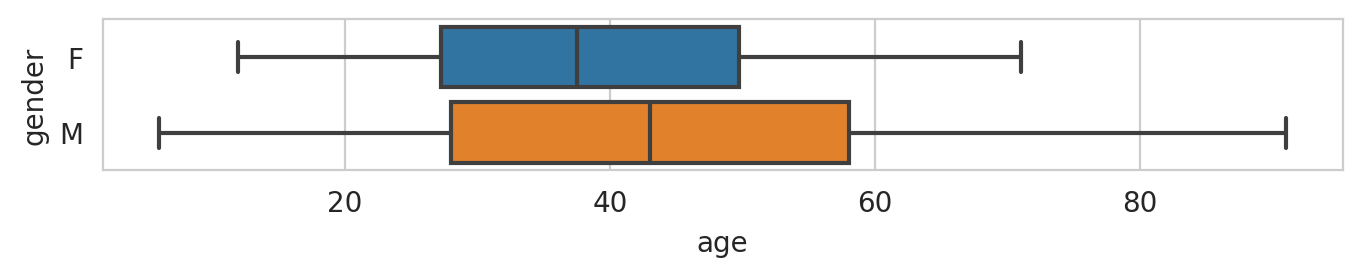

In [52]:
plt.figure(figsize=(8,1), dpi=200)
with sns.axes_style("whitegrid"):
  sns.boxplot(data=gender_age_mod_df,
              x='age',
              y='gender')
  sns.boxplot
plt.show()

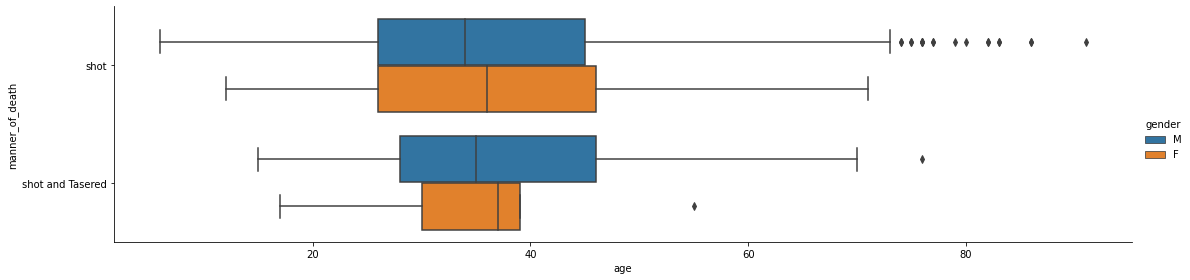

In [53]:
sns.catplot(data=df_fatalities, x='age', y='manner_of_death', hue='gender', kind='box', orient='h', height=4, aspect=4)

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [54]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,City,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [55]:
armed = df_fatalities['armed'].value_counts()
armed.head(60)

gun                        1398
knife                       373
vehicle                     177
unarmed                     171
undetermined                117
toy weapon                  104
machete                      18
unknown weapon               18
ax                            9
Taser                         9
baseball bat                  8
sword                         8
hammer                        7
box cutter                    7
metal pipe                    7
hatchet                       6
crossbow                      6
gun and knife                 5
blunt object                  5
screwdriver                   5
guns and explosives           3
rock                          3
metal stick                   3
scissors                      3
beer bottle                   2
hatchet and gun               2
piece of wood                 2
chain saw                     2
pipe                          2
brick                         2
shovel                        2
metal ob

In [56]:
armed.tail(8)

stapler                             1
baseball bat and fireplace poker    1
straight edge razor                 1
hand torch                          1
garden tool                         1
pole                                1
pick-axe                            1
pen                                 1
Name: armed, dtype: int64

In [57]:
print(f"There were {armed['unarmed']} deaths of unarmed people.")

There were 171 deaths of unarmed people.


# They were armed with what!?

There are many 'armed' people that may be misleadingly labeled as such. For instance one person was killed while being armed with a pen. Another was armed with a stapler. Another 18 people had an unknown weapon, and 117 people had an undetermined weapon. The details of these circumstances may or may not justify the use of deadly force.

---

**Fictional Scenario 1 - the use of deadly force was justified**

The officers arrived on scene after calls reporting multiple people were injured by a known person with a history of violence who is under the influence of drugs or alcohol. The pen could have been a tactical pen made out of a strong metal with a pointed end specifically to be used as a weapon.  They could have been brandishing it at the officers while eratically yelling and threatening to hurt people. They could have been holding someone hostage.

---

**Fictional Scenario 2 - the use of deadly force was not justified**

The person had a cheap plastic Bic pen. The pen was in their pocket 
during the entire enounter, with their hands visible the entire time while calmly speaking and following orders. The pen was an excuse or justification for the use of deadly force. Or perhaps the pen wasn't even found until after the fact while police were searching through the pockets of the deceased - it's existence unknown to the to the police but used to justify their actions after the fact.

---

# Summary and proposed solution:
There are many, well documented cases where police were justified in their use of deadly force. Unfortunately, there are also numerous, well documented instances of excessive force by police. These incidents cause many to feel that there is a lack of accountability for police in their use of force.

This position that protects someone who uses force inappropriately could attract people who are more inclined to be violent.  They would then be protected by the badge they wear.  It seems attempts at accountability within the force is punished far more swiftly than inappropritate use of force, as seen in the way [police culture punishes whistleblowers](https://www.theatlantic.com/ideas/archive/2020/07/what-police-departments-do-whistle-blowers/613687/).

The power entrusted to law enforcement is dangerous when there is no personal accountability due to their qualified immunity. This could be corrected by removing the qualified immunity, and requiring all police to carry a professional insurance policy. This insurance would be similar to doctors being required to carry malpractice insurance - or how drivers must have car insurance. Insurance becomes more expensive for individuals who have more incidents regardless of the outcome of any investigation, just like with auto insurance. After enough incidents, individuals can become uninsurable. This would punish individuals more with each subsequent incident until they are permanently removed from law enforcement. This gives a personal incentive for police to deescalate situations rather than to resort to violence.

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [58]:
age_df = df_fatalities.groupby("age", as_index=False).count()
under_25 = age_df[age_df['age']<25]['id'].sum()
total_fatalities = age_df['id'].sum()
print(f"{round(under_25/total_fatalities*100, 0)}% of people killed by police were under 25 years old.")

18.0% of people killed by police were under 25 years old.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

<Axes: xlabel='age', ylabel='Count'>

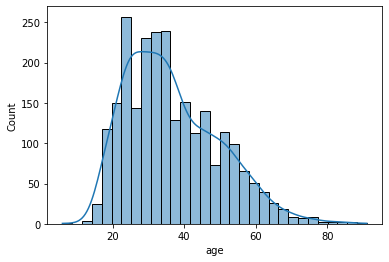

In [59]:
sns.histplot(df_fatalities['age'], kde=True)

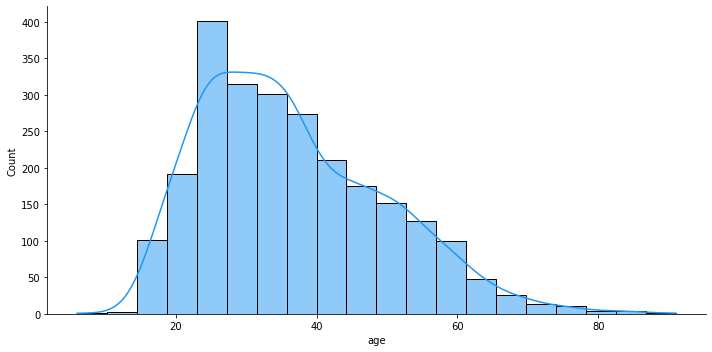

In [60]:
sns.displot(df_fatalities['age'],
            bins=20,
            aspect=2,
            kde=True, 
            color='#2196f3',
            )

# plt.title(f'1970s Home Values in Boston. Average: ${(1000*df_data.Organisation.mean()):.6}')
# plt.xlabel('Price in 000s')
# plt.ylabel('Nr. of Homes')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [61]:
df_fatalities['race'].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

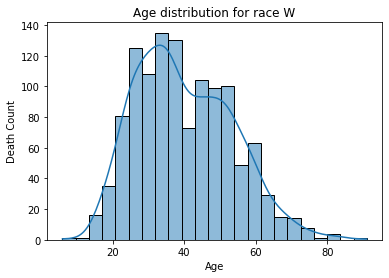

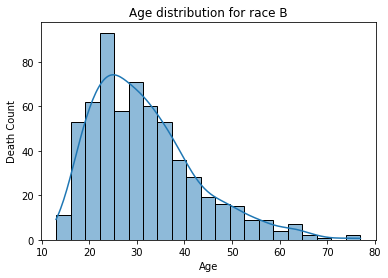

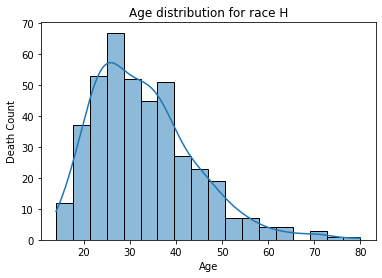

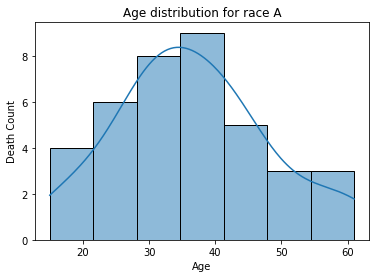

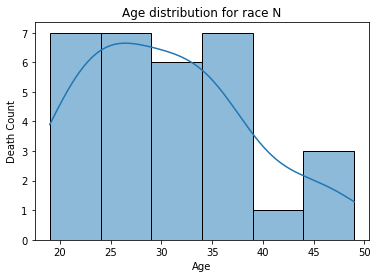

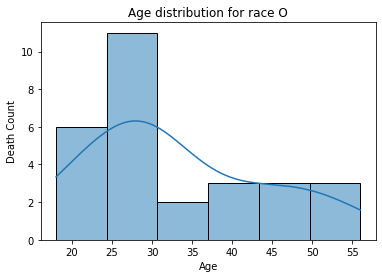

In [62]:
list_race = ['W', 'B', "H", 'A', 'N', 'O']

for race in list_race:
    df_race = df_fatalities[df_fatalities['race']==race]
    sns.histplot(df_race['age'], kde=True,  label=race)
    plt.xlabel("Age")
    plt.ylabel("Death Count")
    plt.title(f"Age distribution for race {race}")
    plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [63]:
df_race_death_count=df_fatalities['race'].value_counts()
print(type(df_race_death_count))
df_race_death_count

<class 'pandas.core.series.Series'>


W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [64]:
bar = px.bar(x = df_race_death_count.index, # index = category name
                 y = df_race_death_count.values, # count
                 title='Poverty Rate by State',
                #  hover_name=df_pct_poverty_state["Geographic Area"],
                #  color=df_pct_poverty_state["poverty_rate"],
                 color_continuous_scale='Agsunset')
     
bar.update_layout(xaxis_title='State',
                              yaxis_title='Percent Poverty Rate',
                              coloraxis_showscale=False)
     
bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [65]:
percent_mental_illness = df_fatalities['signs_of_mental_illness'].sum() / len(df_fatalities) * 100
print(f"Percentage of people killed by police with mental illness: {percent_mental_illness}%")

Percentage of people killed by police with mental illness: 24.970414201183434%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [66]:
top_10_fatal_cities = df_fatalities['City'].value_counts().head(10)
top_10_fatal_cities_list = top_10_fatal_cities.index.tolist() # creates list of the 10 cities with the most fatalities
top_10_fatal_cities_list_fatalities = top_10_fatal_cities.tolist() # creates list of the number of fatalities in the 10 cities
print(type(top_10_fatal_cities_list))
top_10_fatal_cities

<class 'list'>


Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: City, dtype: int64

In [67]:
top_10_fatal_cities_df = pd.DataFrame(top_10_fatal_cities_list, columns=['City']) # creates a single column DF with name 'City' and the cities from the list
top_10_fatal_cities_df['Total Fatalities'] = top_10_fatal_cities_list_fatalities # Adds the column 'Total Fatalities' and the values for the number of police induced fatalities
top_10_fatal_cities_df

,City,Total Fatalities
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


In [68]:
top_10_geographic_area_list = df_fatalities.groupby('City')['Geographic Area'].first().loc[top_10_fatal_cities_df['City']].tolist() # creates list of the state (Geographic Area) for the 10 cities

top_10_geographic_area_list

['CA', 'AZ', 'TX', 'IL', 'NV', 'TX', 'OH', 'TX', 'FL', 'MO']

In [69]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,City,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [70]:
bar = px.bar(x = top_10_fatal_cities_df['City'], # index = category name
                 y = top_10_fatal_cities_df['Total Fatalities'], # count
                 title='Top 10 Fatal Cities',
                #  hover_name=df_pct_poverty_state["Geographic Area"],
                #  color=df_pct_poverty_state["poverty_rate"],
                 color_continuous_scale='Agsunset')
     
bar.update_layout(xaxis_title='City',
                              yaxis_title='Number of Police Caused Deaths',
                              coloraxis_showscale=False)
     
bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [71]:
# top_10_fatal_cities_df

In [72]:
top_10_fatal_cities_df['Geographic Area'] = top_10_geographic_area_list # adds 'Geographic Area' values
top_10_fatal_cities_df

,City,Total Fatalities,Geographic Area
0,Los Angeles,39,CA
1,Phoenix,31,AZ
2,Houston,27,TX
3,Chicago,25,IL
4,Las Vegas,21,NV
5,San Antonio,20,TX
6,Columbus,19,OH
7,Austin,18,TX
8,Miami,18,FL
9,St. Louis,15,MO


In [73]:
top_10_fatal_cities_df = top_10_fatal_cities_df.reindex(columns=[
    'City',
    'Geographic Area',
    'Total Fatalities'])
top_10_fatal_cities_df

,City,Geographic Area,Total Fatalities
0,Los Angeles,CA,39
1,Phoenix,AZ,31
2,Houston,TX,27
3,Chicago,IL,25
4,Las Vegas,NV,21
5,San Antonio,TX,20
6,Columbus,OH,19
7,Austin,TX,18
8,Miami,FL,18
9,St. Louis,MO,15


In [74]:
df_share_race_city_copy = df_share_race_city.copy()
df_share_race_city_copy['City'] = df_share_race_city_copy['City'].str.replace(' city', "")  # remove the ' city' substring
top_10_fatal_cities_race_df = pd.merge(top_10_fatal_cities_df, df_share_race_city_copy, how='left', on=["Geographic Area", "City"])

top_10_fatal_cities_race_df.rename(columns={
    'share_white': 'White % of Pop.',
    'share_black': 'Black % of Pop.',
    'share_hispanic': 'Hispanic % of Pop.',
    'share_native_american': 'Native American % of Pop.',
    'share_asian': 'Asian % of Pop.'
    }, inplace=True)

top_10_fatal_cities_race_df

,City,Geographic Area,Total Fatalities,White % of Pop.,Black % of Pop.,Native American % of Pop.,Asian % of Pop.,Hispanic % of Pop.
0,Los Angeles,CA,39,49.80,9.60,0.70,11.30,48.50
1,Phoenix,AZ,31,65.90,6.50,2.20,3.20,40.80
2,Houston,TX,27,50.50,23.70,0.70,6.00,43.80
3,Chicago,IL,25,45.00,32.90,0.50,5.50,28.90
4,Las Vegas,NV,21,62.10,11.10,0.70,6.10,31.50
5,San Antonio,TX,20,72.60,6.90,0.90,2.40,63.20
6,Columbus,OH,19,61.50,28.00,0.30,4.10,5.60
7,Austin,TX,18,68.30,8.10,0.90,6.30,35.10
8,Miami,FL,18,72.60,19.20,0.30,1.00,70.00
9,St. Louis,MO,15,43.90,49.20,0.30,2.90,3.50


In [75]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,City,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [76]:
fatalities_race_df = df_fatalities.groupby(['Geographic Area', 'City', 'race'], as_index=False).count()
fatalities_race_df.head(10)

,Geographic Area,City,race,id,name,date,manner_of_death,armed,age,gender,signs_of_mental_illness,threat_level,flee,body_camera
0,AK,Anchorage,W,3,3,3,3,3,3,3,3,3,3,3
1,AK,Barrow,N,1,1,1,1,1,1,1,1,1,1,1
2,AK,Big Lake,B,1,1,1,1,1,1,1,1,1,1,1
3,AK,Fairbanks,N,3,3,3,3,3,3,3,3,3,3,3
4,AK,Fairbanks,W,1,1,1,1,1,1,1,1,1,1,1
5,AK,Houston,N,1,1,1,1,1,1,1,1,1,1,1
6,AK,Kenai Peninsula,W,1,1,1,1,1,1,1,1,1,1,1
7,AK,Spenard,N,1,1,1,1,1,1,1,1,1,1,1
8,AK,Wasilla,W,2,2,2,2,2,2,2,2,2,2,2
9,AL,Abbeville,B,1,1,1,1,1,1,1,1,1,1,1


In [77]:
fatalities_race_df_clean = fatalities_race_df.drop(columns=['name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera'])

fatalities_race_df_clean.head(10)

fatalities_race_df_clean.rename(columns={'id': 'Fatalities By Race', 'race': 'Race'}, inplace=True)

# fatalities_race_df_clean.reindex(columns={'id': 'Fatalities', 'race': 'Race'}, inplace=True
#     'Geographic Area',
#     'City',
#     'Race'
#     'Fatalities'])

fatalities_race_df_clean

,Geographic Area,City,Race,Fatalities By Race
0,AK,Anchorage,W,3
1,AK,Barrow,N,1
2,AK,Big Lake,B,1
3,AK,Fairbanks,N,3
4,AK,Fairbanks,W,1
...,...,...,...,...
1668,WY,Cheyenne,N,1
1669,WY,Douglas,H,1
1670,WY,Douglas,W,1
1671,WY,Gillette,W,1


In [78]:
fatalities_race_clean_df = fatalities_race_df_clean.pivot_table(index=['City', 'Geographic Area'], values='Fatalities By Race', columns='Race', fill_value=0, aggfunc='sum')
fatalities_race_clean_df.columns = ['Fatalities of '+col for col in fatalities_race_clean_df.columns]
fatalities_race_clean_df.reset_index(inplace=True)
fatalities_race_clean_df

,City,Geographic Area,Fatalities of A,Fatalities of B,Fatalities of H,Fatalities of N,Fatalities of O,Fatalities of W
0,Abbeville,AL,0,1,0,0,0,0
1,Abilene,TX,0,0,0,0,0,1
2,Abingdon,MD,0,0,0,0,0,1
3,Acworth,GA,0,0,0,0,0,1
4,Addison,TX,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
1421,Yuba City,CA,1,0,0,0,0,0
1422,Yulee,FL,0,0,0,0,0,1
1423,Yuma,AZ,0,0,1,0,0,0
1424,Zanesville,OH,0,0,0,0,0,1


In [79]:
# W: White, non-Hispanic
# B: Black, non-Hispanic
# A: Asian
# N: Native American
# H: Hispanic
# O: Other
# None: unknown

fatalities_race_clean_df.rename(columns={'Fatalities of A': 'Asian Fatalities',
                                         'Fatalities of B': 'Black Fatalities',
                                         'Fatalities of H': 'Hispanic Fatalities',
                                         'Fatalities of N': 'Native American Fatalities',
                                         'Fatalities of O': 'Other Fatalities',
                                         'Fatalities of W': 'White Fatalities'
                                         }, inplace=True)
fatalities_race_clean_df

,City,Geographic Area,Asian Fatalities,Black Fatalities,Hispanic Fatalities,Native American Fatalities,Other Fatalities,White Fatalities
0,Abbeville,AL,0,1,0,0,0,0
1,Abilene,TX,0,0,0,0,0,1
2,Abingdon,MD,0,0,0,0,0,1
3,Acworth,GA,0,0,0,0,0,1
4,Addison,TX,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
1421,Yuba City,CA,1,0,0,0,0,0
1422,Yulee,FL,0,0,0,0,0,1
1423,Yuma,AZ,0,0,1,0,0,0
1424,Zanesville,OH,0,0,0,0,0,1


In [80]:
top_10_fatal_cities_race_df.rename(columns={'share_white': 'White % of Pop.',
                                            'share_black': 'Black % of Pop.',
                                            'share_hispanic': 'Hispanic % of Pop.',
                                            'share_native_american': 'Native American % of Pop.',
                                            'share_asian': 'Asian % of Pop.'
                                            }, inplace=True)

top_10_fatal_cities_race_df

,City,Geographic Area,Total Fatalities,White % of Pop.,Black % of Pop.,Native American % of Pop.,Asian % of Pop.,Hispanic % of Pop.
0,Los Angeles,CA,39,49.80,9.60,0.70,11.30,48.50
1,Phoenix,AZ,31,65.90,6.50,2.20,3.20,40.80
2,Houston,TX,27,50.50,23.70,0.70,6.00,43.80
3,Chicago,IL,25,45.00,32.90,0.50,5.50,28.90
4,Las Vegas,NV,21,62.10,11.10,0.70,6.10,31.50
5,San Antonio,TX,20,72.60,6.90,0.90,2.40,63.20
6,Columbus,OH,19,61.50,28.00,0.30,4.10,5.60
7,Austin,TX,18,68.30,8.10,0.90,6.30,35.10
8,Miami,FL,18,72.60,19.20,0.30,1.00,70.00
9,St. Louis,MO,15,43.90,49.20,0.30,2.90,3.50


In [81]:
merged_df = pd.merge(top_10_fatal_cities_race_df, fatalities_race_clean_df, on=['City', 'Geographic Area'], how='left')
# merged_df = merged_df.pivot_table(index=[
#     'City',
#     'Geographic Area',
#     'Total Fatalities',
#     'share_white',
#     'share_black',
#     'share_native_american',
#     'share_asian',
#     'share_hispanic'],
#     values='Fatalities By Race', columns='Race', fill_value=0, aggfunc='sum')
# merged_df.columns = ['Fatalities of '+col for col in merged_df.columns]
# merged_df.reset_index(inplace=True)
merged_df.sort_values('Total Fatalities', ascending=False)

merged_df

,City,Geographic Area,Total Fatalities,White % of Pop.,Black % of Pop.,Native American % of Pop.,Asian % of Pop.,Hispanic % of Pop.,Asian Fatalities,Black Fatalities,Hispanic Fatalities,Native American Fatalities,Other Fatalities,White Fatalities
0,Los Angeles,CA,39,49.80,9.60,0.70,11.30,48.50,1,10,19,0,0,6
1,Phoenix,AZ,31,65.90,6.50,2.20,3.20,40.80,0,2,11,3,0,12
2,Houston,TX,27,50.50,23.70,0.70,6.00,43.80,1,15,6,0,0,3
3,Chicago,IL,25,45.00,32.90,0.50,5.50,28.90,0,21,1,0,0,2
4,Las Vegas,NV,21,62.10,11.10,0.70,6.10,31.50,0,3,5,0,0,9
5,San Antonio,TX,20,72.60,6.90,0.90,2.40,63.20,0,3,12,0,0,3
6,Columbus,OH,19,61.50,28.00,0.30,4.10,5.60,0,10,0,0,1,5
7,Austin,TX,18,68.30,8.10,0.90,6.30,35.10,0,3,2,0,0,11
8,Miami,FL,18,72.60,19.20,0.30,1.00,70.00,0,8,6,0,0,2
9,St. Louis,MO,15,43.90,49.20,0.30,2.90,3.50,0,11,0,0,0,3


In [82]:
merged_df['White % of Fatalities'] = merged_df['White Fatalities'] / merged_df['Total Fatalities'] * 100
merged_df['Black % of Fatalities'] = merged_df['Black Fatalities'] / merged_df['Total Fatalities'] * 100
merged_df['Hispanic % of Fatalities'] = merged_df['Hispanic Fatalities'] / merged_df['Total Fatalities'] * 100
merged_df['Native American % of Fatalities'] = merged_df['Native American Fatalities'] / merged_df['Total Fatalities'] * 100
merged_df['Asian % of Fatalities'] = merged_df['Asian Fatalities'] / merged_df['Total Fatalities'] * 100

merged_df

,City,Geographic Area,Total Fatalities,White % of Pop.,Black % of Pop.,Native American % of Pop.,Asian % of Pop.,Hispanic % of Pop.,Asian Fatalities,Black Fatalities,Hispanic Fatalities,Native American Fatalities,Other Fatalities,White Fatalities,White % of Fatalities,Black % of Fatalities,Hispanic % of Fatalities,Native American % of Fatalities,Asian % of Fatalities
0,Los Angeles,CA,39,49.80,9.60,0.70,11.30,48.50,1,10,19,0,0,6,15.38,25.64,48.72,0.00,2.56
1,Phoenix,AZ,31,65.90,6.50,2.20,3.20,40.80,0,2,11,3,0,12,38.71,6.45,35.48,9.68,0.00
2,Houston,TX,27,50.50,23.70,0.70,6.00,43.80,1,15,6,0,0,3,11.11,55.56,22.22,0.00,3.70
3,Chicago,IL,25,45.00,32.90,0.50,5.50,28.90,0,21,1,0,0,2,8.00,84.00,4.00,0.00,0.00
4,Las Vegas,NV,21,62.10,11.10,0.70,6.10,31.50,0,3,5,0,0,9,42.86,14.29,23.81,0.00,0.00
5,San Antonio,TX,20,72.60,6.90,0.90,2.40,63.20,0,3,12,0,0,3,15.00,15.00,60.00,0.00,0.00
6,Columbus,OH,19,61.50,28.00,0.30,4.10,5.60,0,10,0,0,1,5,26.32,52.63,0.00,0.00,0.00
7,Austin,TX,18,68.30,8.10,0.90,6.30,35.10,0,3,2,0,0,11,61.11,16.67,11.11,0.00,0.00
8,Miami,FL,18,72.60,19.20,0.30,1.00,70.00,0,8,6,0,0,2,11.11,44.44,33.33,0.00,0.00
9,St. Louis,MO,15,43.90,49.20,0.30,2.90,3.50,0,11,0,0,0,3,20.00,73.33,0.00,0.00,0.00


In [83]:
merged_df = merged_df.reindex(columns=[
    'City',
    'Geographic Area',
    'Total Fatalities',
    'White Fatalities',
    'White % of Pop.',
    'White % of Fatalities',
    'Black Fatalities',
    'Black % of Pop.',
    'Black % of Fatalities',
    'Hispanic Fatalities',
    'Hispanic % of Pop.',
    'Hispanic % of Fatalities',
    'Native American Fatalities',
    'Native American % of Pop.',
    'Native American % of Fatalities',
    'Asian Fatalities',
    'Asian % of Pop.',
    'Asian % of Fatalities',
    'Other Fatalities',
    ])
merged_df

,City,Geographic Area,Total Fatalities,White Fatalities,White % of Pop.,White % of Fatalities,Black Fatalities,Black % of Pop.,Black % of Fatalities,Hispanic Fatalities,Hispanic % of Pop.,Hispanic % of Fatalities,Native American Fatalities,Native American % of Pop.,Native American % of Fatalities,Asian Fatalities,Asian % of Pop.,Asian % of Fatalities,Other Fatalities
0,Los Angeles,CA,39,6,49.80,15.38,10,9.60,25.64,19,48.50,48.72,0,0.70,0.00,1,11.30,2.56,0
1,Phoenix,AZ,31,12,65.90,38.71,2,6.50,6.45,11,40.80,35.48,3,2.20,9.68,0,3.20,0.00,0
2,Houston,TX,27,3,50.50,11.11,15,23.70,55.56,6,43.80,22.22,0,0.70,0.00,1,6.00,3.70,0
3,Chicago,IL,25,2,45.00,8.00,21,32.90,84.00,1,28.90,4.00,0,0.50,0.00,0,5.50,0.00,0
4,Las Vegas,NV,21,9,62.10,42.86,3,11.10,14.29,5,31.50,23.81,0,0.70,0.00,0,6.10,0.00,0
5,San Antonio,TX,20,3,72.60,15.00,3,6.90,15.00,12,63.20,60.00,0,0.90,0.00,0,2.40,0.00,0
6,Columbus,OH,19,5,61.50,26.32,10,28.00,52.63,0,5.60,0.00,0,0.30,0.00,0,4.10,0.00,1
7,Austin,TX,18,11,68.30,61.11,3,8.10,16.67,2,35.10,11.11,0,0.90,0.00,0,6.30,0.00,0
8,Miami,FL,18,2,72.60,11.11,8,19.20,44.44,6,70.00,33.33,0,0.30,0.00,0,1.00,0.00,0
9,St. Louis,MO,15,3,43.90,20.00,11,49.20,73.33,0,3.50,0.00,0,0.30,0.00,0,2.90,0.00,0


In [84]:
city_race_fatalities_df = merged_df[[
    'City',
    'White % of Fatalities',
    'Black % of Fatalities',
    'Hispanic % of Fatalities',
    'Native American % of Fatalities',
    'Asian % of Fatalities',
]]
city_race_fatalities_df

,City,White % of Fatalities,Black % of Fatalities,Hispanic % of Fatalities,Native American % of Fatalities,Asian % of Fatalities
0,Los Angeles,15.38,25.64,48.72,0.00,2.56
1,Phoenix,38.71,6.45,35.48,9.68,0.00
2,Houston,11.11,55.56,22.22,0.00,3.70
3,Chicago,8.00,84.00,4.00,0.00,0.00
4,Las Vegas,42.86,14.29,23.81,0.00,0.00
5,San Antonio,15.00,15.00,60.00,0.00,0.00
6,Columbus,26.32,52.63,0.00,0.00,0.00
7,Austin,61.11,16.67,11.11,0.00,0.00
8,Miami,11.11,44.44,33.33,0.00,0.00
9,St. Louis,20.00,73.33,0.00,0.00,0.00


In [85]:
city_race_pop_df = merged_df[[
    'City',
    'White % of Pop.',
    'Black % of Pop.',
    'Hispanic % of Pop.',
    'Native American % of Pop.',
    'Asian % of Pop.',
]]

city_race_pop_df

,City,White % of Pop.,Black % of Pop.,Hispanic % of Pop.,Native American % of Pop.,Asian % of Pop.
0,Los Angeles,49.80,9.60,48.50,0.70,11.30
1,Phoenix,65.90,6.50,40.80,2.20,3.20
2,Houston,50.50,23.70,43.80,0.70,6.00
3,Chicago,45.00,32.90,28.90,0.50,5.50
4,Las Vegas,62.10,11.10,31.50,0.70,6.10
5,San Antonio,72.60,6.90,63.20,0.90,2.40
6,Columbus,61.50,28.00,5.60,0.30,4.10
7,Austin,68.30,8.10,35.10,0.90,6.30
8,Miami,72.60,19.20,70.00,0.30,1.00
9,St. Louis,43.90,49.20,3.50,0.30,2.90


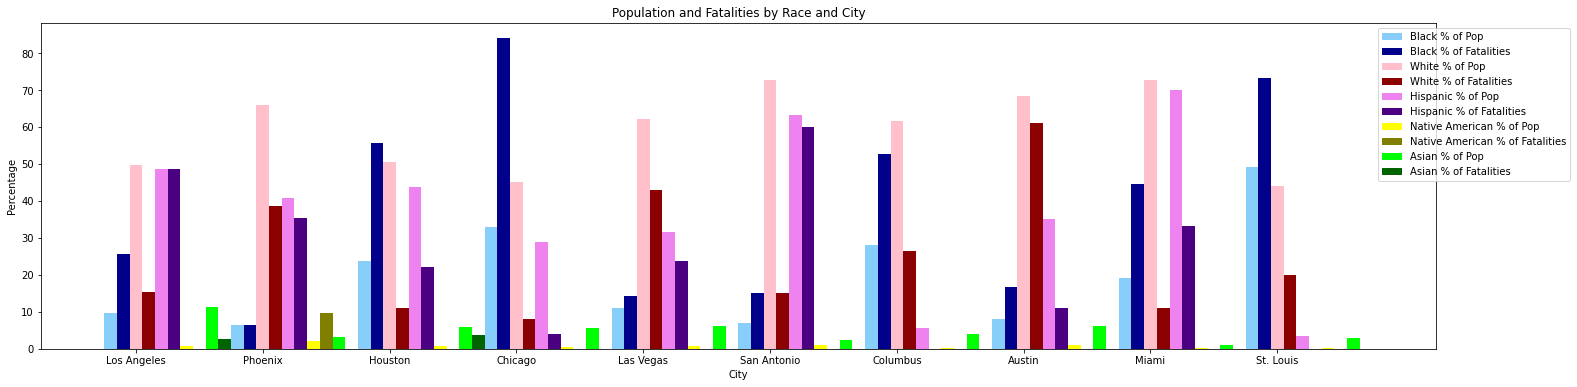

In [86]:
# FROM CHAT GPT
# import numpy as np
# import matplotlib.pyplot as plt

# Data
cities = city_race_pop_df['City'].tolist()
pop_black = city_race_pop_df['Black % of Pop.'].tolist()
fatal_black = city_race_fatalities_df['Black % of Fatalities'].tolist()
pop_white = city_race_pop_df['White % of Pop.'].tolist()
fatal_white = city_race_fatalities_df['White % of Fatalities'].tolist()
pop_hispanic = city_race_pop_df['Hispanic % of Pop.'].tolist()
fatal_hispanic = city_race_fatalities_df['Hispanic % of Fatalities'].tolist()

pop_native = city_race_pop_df['Native American % of Pop.'].tolist()
fatal_native = city_race_fatalities_df['Native American % of Fatalities'].tolist()
pop_asian = city_race_pop_df['Asian % of Pop.'].tolist()
fatal_asian = city_race_fatalities_df['Asian % of Fatalities'].tolist()

# Set the figure size
plt.figure(figsize=(25, 6))

# Set the bar width
bar_width = 0.1

# Create bars for each race and city
black_pop = plt.bar(np.arange(len(cities)), pop_black, width=bar_width, color='lightskyblue', label='Black % of Pop')
black_fatal = plt.bar(np.arange(len(cities))+bar_width, fatal_black, width=bar_width, color='darkblue', label='Black % of Fatalities')
white_pop = plt.bar(np.arange(len(cities))+2*bar_width, pop_white, width=bar_width, color='pink', label='White % of Pop')
white_fatal = plt.bar(np.arange(len(cities))+3*bar_width, fatal_white, width=bar_width, color='darkred', label='White % of Fatalities')
hispanic_pop = plt.bar(np.arange(len(cities))+4*bar_width, pop_hispanic, width=bar_width, color='violet', label='Hispanic % of Pop')
hispanic_fatal = plt.bar(np.arange(len(cities))+5*bar_width, fatal_hispanic, width=bar_width, color='indigo', label='Hispanic % of Fatalities')

native_pop = plt.bar(np.arange(len(cities))+6*bar_width, pop_native, width=bar_width, color='yellow', label='Native American % of Pop')
native_fatal = plt.bar(np.arange(len(cities))+7*bar_width, fatal_native, width=bar_width, color='olive', label='Native American % of Fatalities')
asian_pop = plt.bar(np.arange(len(cities))+8*bar_width, pop_asian, width=bar_width, color='lime', label='Asian % of Pop')
asian_fatal = plt.bar(np.arange(len(cities))+9*bar_width, fatal_asian, width=bar_width, color='darkgreen', label='Asian % of Fatalities')

# Set the title and axis labels
plt.title('Population and Fatalities by Race and City')
plt.xlabel('City')
plt.ylabel('Percentage')

# Set the x-axis tick labels
plt.xticks(np.arange(len(cities))+2*bar_width, cities)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))

# Show the plot
plt.show()


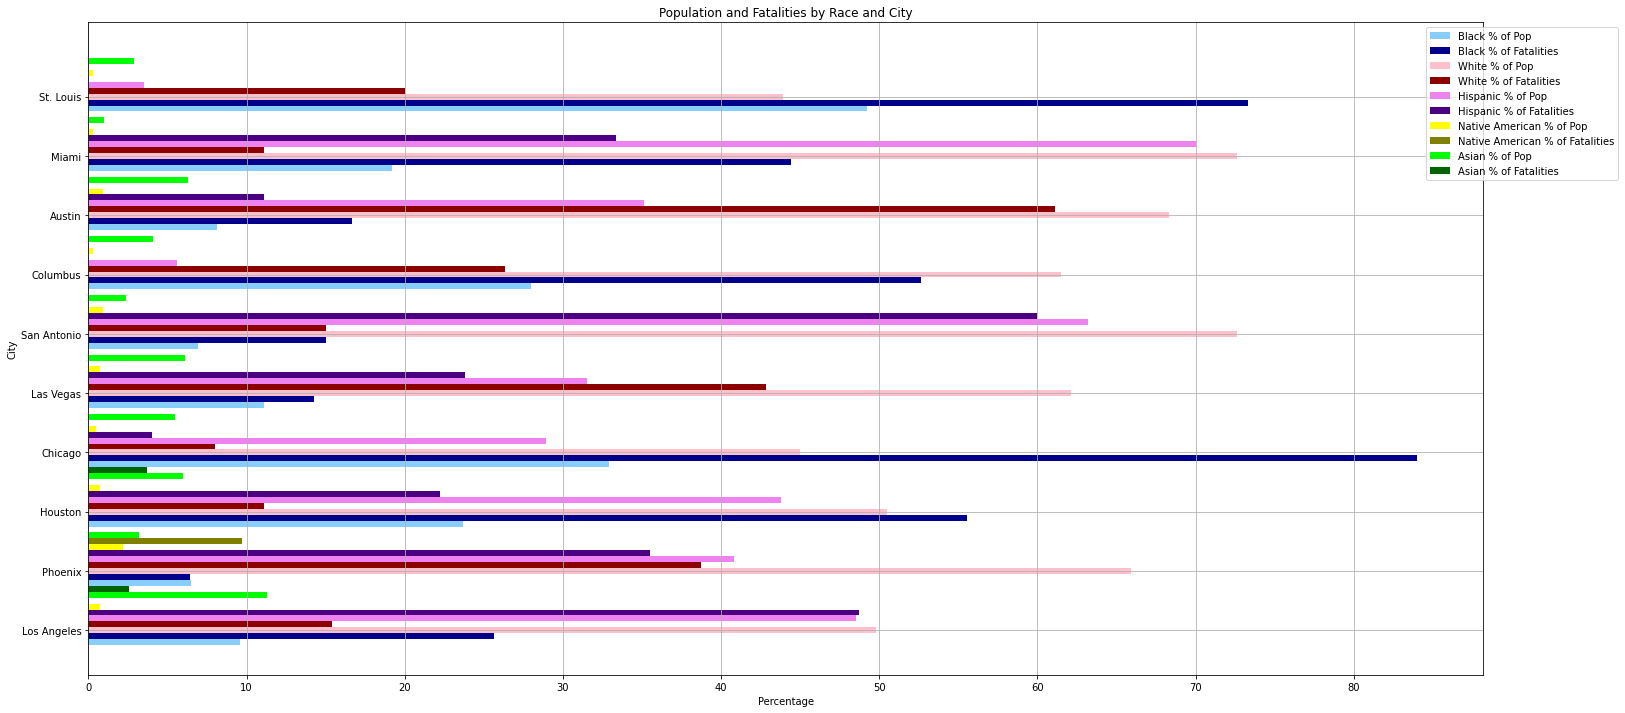

In [87]:
# Make the graph horizontal

# Data
cities = city_race_pop_df['City'].tolist()
pop_black = city_race_pop_df['Black % of Pop.'].tolist()
fatal_black = city_race_fatalities_df['Black % of Fatalities'].tolist()
pop_white = city_race_pop_df['White % of Pop.'].tolist()
fatal_white = city_race_fatalities_df['White % of Fatalities'].tolist()
pop_hispanic = city_race_pop_df['Hispanic % of Pop.'].tolist()
fatal_hispanic = city_race_fatalities_df['Hispanic % of Fatalities'].tolist()
pop_native = city_race_pop_df['Native American % of Pop.'].tolist()
fatal_native = city_race_fatalities_df['Native American % of Fatalities'].tolist()
pop_asian = city_race_pop_df['Asian % of Pop.'].tolist()
fatal_asian = city_race_fatalities_df['Asian % of Fatalities'].tolist()

# Set the figure size
plt.figure(figsize=(25, 12))

# Add grid
plt.grid(True)

# Set the bar width
bar_height = 0.1

# Create bars for each race and city
black_pop = plt.barh(np.arange(len(cities)), pop_black, height=bar_height, color='lightskyblue', label='Black % of Pop')
black_fatal = plt.barh(np.arange(len(cities))+bar_height, fatal_black, height=bar_height, color='darkblue', label='Black % of Fatalities')
white_pop = plt.barh(np.arange(len(cities))+2*bar_height, pop_white, height=bar_height, color='pink', label='White % of Pop')
white_fatal = plt.barh(np.arange(len(cities))+3*bar_height, fatal_white, height=bar_height, color='darkred', label='White % of Fatalities')
hispanic_pop = plt.barh(np.arange(len(cities))+4*bar_height, pop_hispanic, height=bar_height, color='violet', label='Hispanic % of Pop')
hispanic_fatal = plt.barh(np.arange(len(cities))+5*bar_height, fatal_hispanic, height=bar_height, color='indigo', label='Hispanic % of Fatalities')
native_pop = plt.barh(np.arange(len(cities))+6*bar_height, pop_native, height=bar_height, color='yellow', label='Native American % of Pop')
native_fatal = plt.barh(np.arange(len(cities))+7*bar_height, fatal_native, height=bar_height, color='olive', label='Native American % of Fatalities')
asian_pop = plt.barh(np.arange(len(cities))+8*bar_height, pop_asian, height=bar_height, color='lime', label='Asian % of Pop')
asian_fatal = plt.barh(np.arange(len(cities))+9*bar_height, fatal_asian, height=bar_height, color='darkgreen', label='Asian % of Fatalities')

# Set the title and axis labels
plt.title('Population and Fatalities by Race and City')
plt.ylabel('City')
plt.xlabel('Percentage')

# Set the x-axis tick labels
plt.yticks(np.arange(len(cities))+2*bar_height, cities)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))

# Show the plot
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [88]:
killings_by_state_df = fatalities_race_clean_df['Geographic Area'].value_counts()

killings_by_state_df

CA    205
TX    106
FL     81
GA     52
NC     48
OH     45
OK     45
TN     40
AL     38
AZ     36
WA     35
KY     35
LA     34
IL     34
PA     33
VA     31
WI     31
SC     31
CO     30
MI     29
MO     29
NY     26
MD     25
MN     23
NJ     23
OR     22
NM     22
IN     21
WV     20
AR     18
MS     18
KS     17
UT     16
MA     15
ID     12
ME     11
NV     10
IA      9
MT      8
AK      8
HI      7
NH      7
CT      7
SD      7
NE      6
DE      6
WY      5
ND      4
VT      2
RI      2
DC      1
Name: Geographic Area, dtype: int64

In [89]:
# https://plotly.com/python/choropleth-maps/

fig = go.Figure(data=go.Choropleth(
    locations=killings_by_state_df.index, # Spatial coordinates
    z = killings_by_state_df.values.astype(int), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Police Killings",
))

fig.update_layout(
    title_text = 'Police Killings by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [90]:
# Working with Color Scales in Plotly
bar = px.bar(x = df_pct_poverty_state["Geographic Area"], # index = category name
                 y = df_pct_poverty_state["poverty_rate"], # count
                 title='Poverty Rate by State',
                 hover_name=df_pct_poverty_state["Geographic Area"],
                 color=df_pct_poverty_state["poverty_rate"],
                 color_continuous_scale='Agsunset')
     
bar.update_layout(xaxis_title='State',
                              yaxis_title='Percent Poverty Rate',
                              coloraxis_showscale=False)
     
bar.show()

Top 10 states with most police killings:

1.   CA    205
2.   TX    106
3.   FL     81
4.   GA     52
5.   NC     48
6.   OH     45
7.   OK     45
8.   TN     40
9.   AL     38
10.  AZ     36

Top 10 states with most poverty:

1.   MS
2.   AZ*
3.   GA*
4.   NM
5.   AR
6.   LA
7.   SC
8.   WV
9.   OK*
10.  AL*

Only 4 matches between the top 10 states for killings and poverty, doesn't seem to be a strong correlating factor.  Looking at the two graphs below there is no evident correlation between the poverty rate and the number of police killings.  It may help to look at the number of police killings relative to the population size of the state, like x per million.

<Figure size 2000x2000 with 0 Axes>

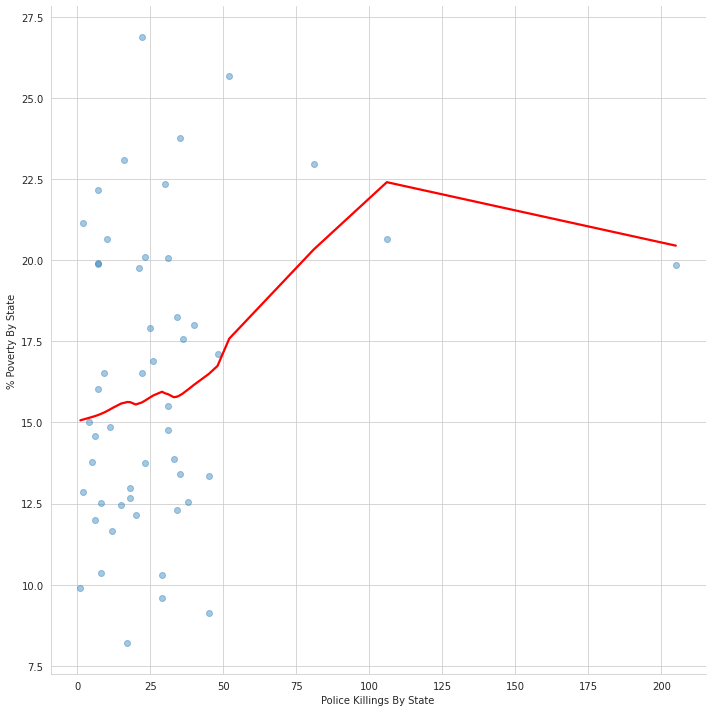

In [91]:
killings_poverty__by_state = pd.DataFrame()
killings_poverty__by_state['Geographic Area'] = killings_by_state_df.index
killings_poverty__by_state['Police Killings By State'] = killings_by_state_df.values
killings_poverty__by_state['% Poverty By State'] = df_pct_poverty_state["poverty_rate"]

# Seaborn .lmplot() https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

plt.figure(figsize=(10,10), dpi=200)

with sns.axes_style("whitegrid"):
  sns.lmplot(data=killings_poverty__by_state,
             x='Police Killings By State',
             y='% Poverty By State',
             height=10,
            #  row='category',
            #  aspect=2,
             line_kws={'color':'red'},
             scatter_kws={'alpha':0.4},
             lowess=True,
             )
plt.show()

Text(0, 0.5, '% of Pop. in Poverty')

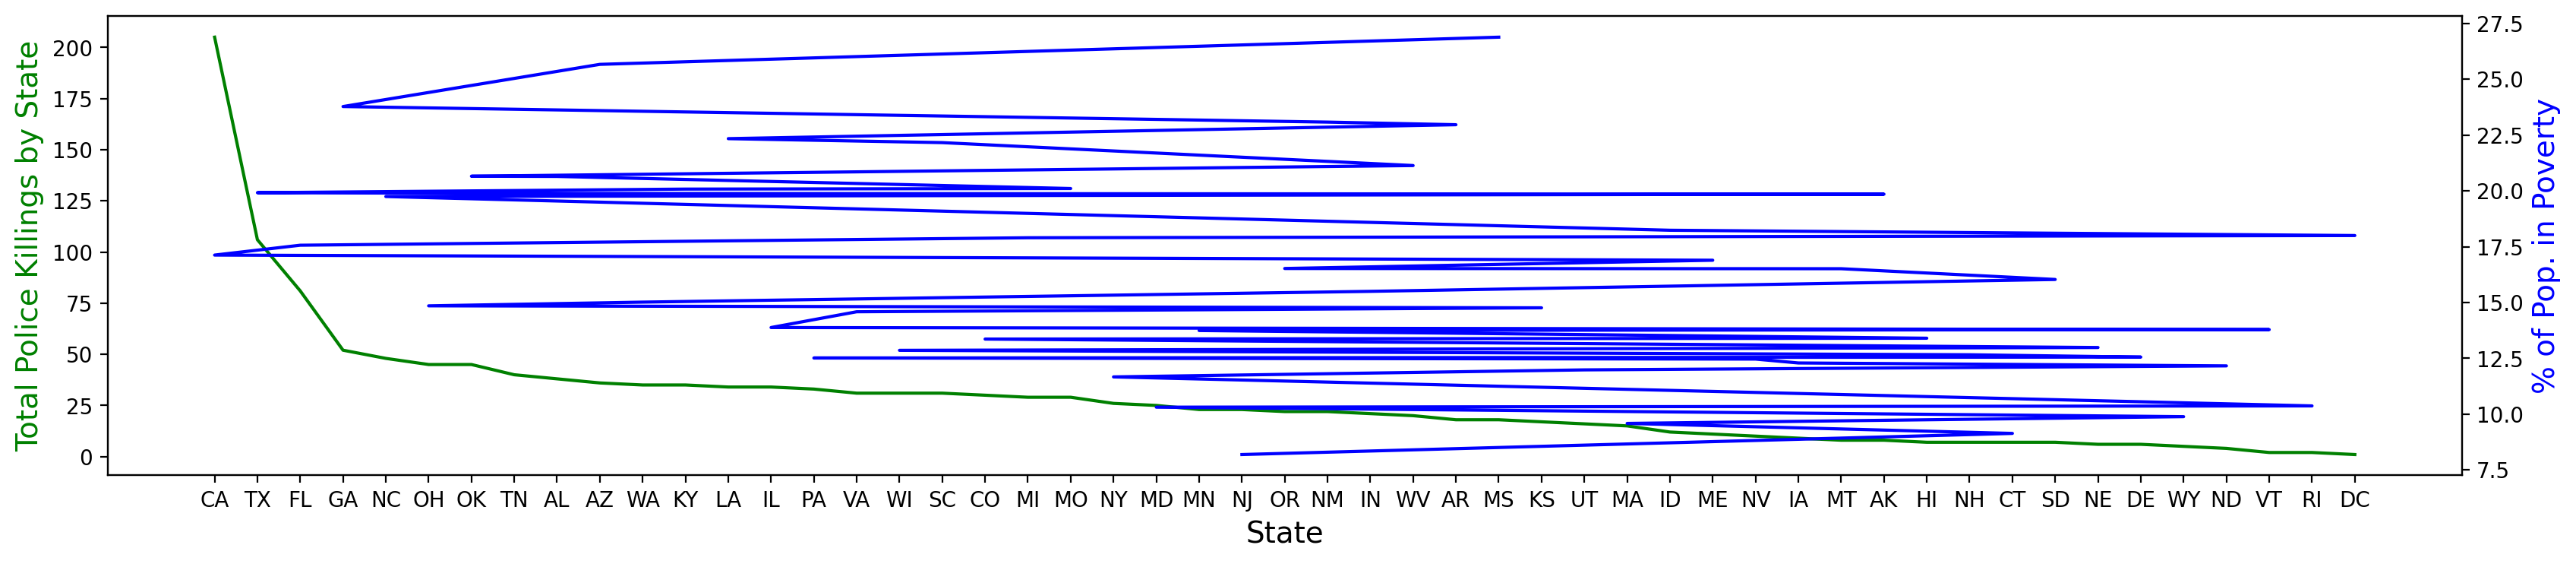

In [92]:
plt.figure(figsize=(20,4), dpi=200)
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(killings_by_state_df.index, killings_by_state_df.values, color='g')
ax2.plot(df_pct_poverty_state['Geographic Area'], df_pct_poverty_state['poverty_rate'], 'b')

ax1.set_xlabel("State", fontsize=14)
ax1.set_ylabel("Total Police Killings by State", color='green', fontsize=14)
ax2.set_ylabel("% of Pop. in Poverty", color="blue", fontsize=14)

In [99]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

In [100]:
df_fatalities.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
City                               object
Geographic Area                    object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [135]:
print(df_fatalities['date'].max())
print(df_fatalities['date'].min())

2017-12-07 00:00:00
2015-01-03 00:00:00


In [149]:
monthly_fatalities_count = df_fatalities.groupby(pd.Grouper(key='date', freq='M')).size()
monthly_fatalities_df = pd.DataFrame()
monthly_fatalities_df['date'] = monthly_fatalities_count.index
monthly_fatalities_df['fatalities'] = monthly_fatalities_count.values
base_date = pd.Timestamp('2015-01-01')
monthly_fatalities_df['months'] = range(1, len(monthly_fatalities_df) + 1)
monthly_fatalities_df

,date,fatalities,months
0,2015-01-31,70,1
1,2015-02-28,78,2
2,2015-03-31,87,3
3,2015-04-30,88,4
4,2015-05-31,85,5
5,2015-06-30,68,6
6,2015-07-31,85,7
7,2015-08-31,86,8
8,2015-09-30,90,9
9,2015-10-31,89,10


<Axes: >

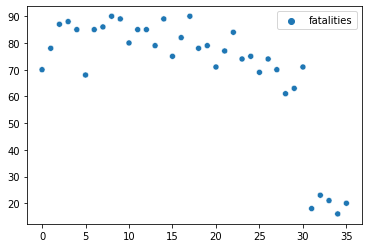

In [137]:
sns.scatterplot(data=monthly_fatalities_df)

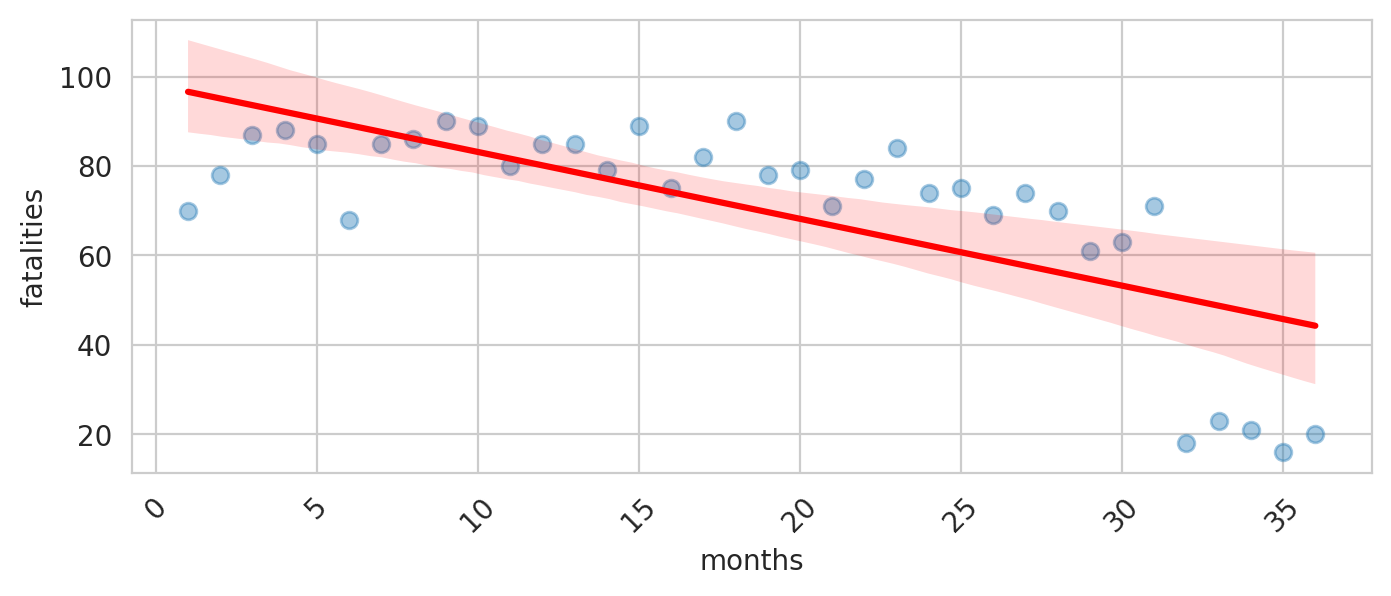

In [150]:
# Seaborn .regplot() https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot

plt.figure(figsize=(8,3), dpi=200)

with sns.axes_style("whitegrid"):
  sns.regplot(data=monthly_fatalities_df,
              x='months',
              y='fatalities',
              line_kws={'color':'red'},
              scatter_kws={'alpha':0.4},
              )
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x2000 with 0 Axes>

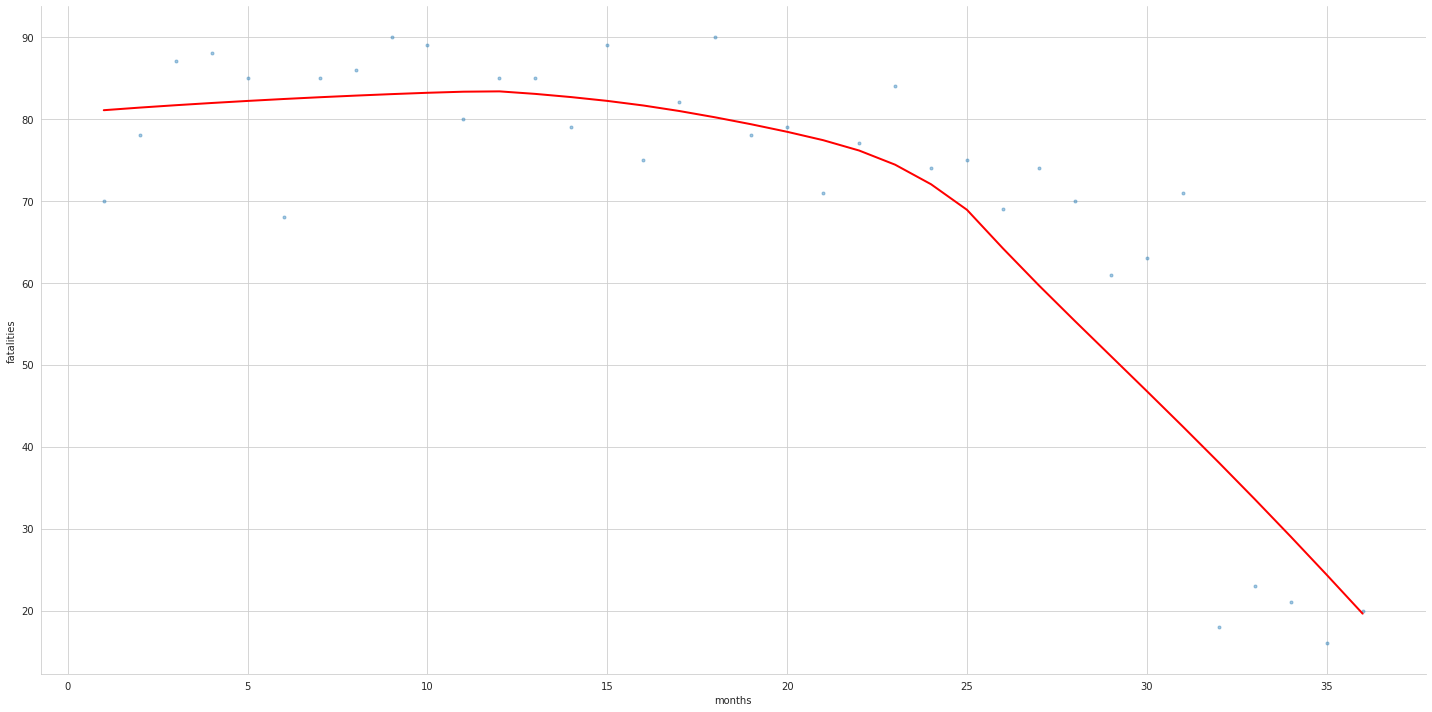

In [157]:
# Seaborn .lmplot() https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

plt.figure(figsize=(10,10), dpi=200)

with sns.axes_style("whitegrid"):
  sns.lmplot(data=monthly_fatalities_df,
             x='months',
             y='fatalities',
             markers='.',            
            height=10,
             aspect=2,
            line_kws={'color': 'red', 'linewidth': 2},
            scatter_kws={'alpha':0.4},
            lowess=True,
             )
plt.show()

The data is over a relatively short time span from Jan 2015 - Dec 2017, it shows a decreasing trend.  Hopefully, this trend continues.

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).